In [62]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)
from sklearn import tree

In [63]:
# Import prospective dataset
df_prospective = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Prospective')

In [64]:
# Import retrospective dataset
df_retro = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Retro')

In [65]:
#checking number of patients and columns in Prospective dataset
print('Number of patients in Prospective dataset {}'. format(df_prospective.shape[0]))
print('Number of variables in Prospective dataset {}'. format(df_prospective.shape[1]))

Number of patients in Prospective dataset 921
Number of variables in Prospective dataset 161


In [66]:
#checking number of patients and columns in Retrospective dataset
print('Number of patients in Retrospective dataset {}'. format(df_retro.shape[0]))
print('Number of variables in Retrospective dataset {}'. format(df_retro.shape[1]))

Number of patients in Retrospective dataset 2391
Number of variables in Retrospective dataset 161


In [67]:
# Create a column to identify source of data
df_prospective['data_record'] = 'prospective'
df_retro['data_record'] = 'retro' 

In [68]:
# Merge both dataframes
df = df_prospective.append(df_retro)

In [69]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 3312
Number of variables in Combined dataset 162


In [70]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [71]:
df.head(5)

,PATIENT NUMBER,PROC NAME,CENTER CODE,SURGEON CODE,REC PROGRESS,CREATED DATE,GENDER,DATE OF BIRTH,AGE AT SURGERY,MARITAL STATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),ECOG,CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,TYPE OF SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,PRE-OP MULTIFOCALITY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,PADUA RISK,POLAR LOCATION,RIM LOCATION,RENAL SINUS,UCS INVASION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO SCORE,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,NEARNESS OF TUMOUR,ANTERIOR OR POSTERIOR,LOCATION TO POLAR LINE,Tumor Consistency on Imaging,Bosniak Classification,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,MULTIFOCALITY,NO OF LESIONS,Imaging Features of other excised tumor,Consistency of the other excised tumor/s,ACCESS,DA VINCI MODEL,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,PRIMARY SURGEON,OPERATIVE TIME(min),ISCHEMIA,CLAMP ARTERY,SELECTIVE ARTERIAL CLAMPING,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,INNER RENORRHAPHY,OUTER RENORRHAPHY,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,HAEMOSTATIC Details,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,SURGICAL CONSIDERATIONS,INTRA-OP COMPLICATION,INTRA-OP COMPLICATIONS,Need to Convert to Radical Nephrectomy,TREATMENT OF COMPLICATION,POST-OP COMPLICATION,SURGICAL COMPLICATIONS,NON SURGICAL COMPLICATIONS,POST-OP TREATMENT OF COMPLICATION,CLAVIEN GRADE,POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,HYSTOTYPE BENIGN YES,FUHRMAN GRADING,SARCOMATOID DIFF,%SARCOMATOID DIFF,NECROSIS,MICRO VENOUS INVASION,UCS INVASION.1,PERIRENAL FAT INVASION,Hilar Fat Invasion,SINUS FAT INVASION,MIC SCORE,ADRENAL INVASION,GEROTA INVASION,Renal Vein Invasion,VENOUS THROMBUS,SURGICAL MARGIN,UNIFOCAL/MULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITE OF POSITIVE NODE,TREATMENT PSM,PT,PN,OTHER TUMORS,DATE OF RECURRENCE,LAST FOLLOW UP DURATION,TIME TO RECURRENCE,LAST FOLLOW UP STATUS,LAST FOLLOW UP RECURRENCE,LAST TREATMENT OF RECURRENCE,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
0,21PAT000148,Partial Nephrectomy,GQHLD5Q4,CWQW6ZDS,Follow-up1,2017-09-24 18:30:00.0,Female,1967.0,50.0,Married,Others,Graduate,57.00,168.0,20.20,7.0,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,Posterior,Lower Pole,13.2,50,7800,0.63,67.7,100.030000,50,168.5,12.0,3(High Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),With renal sinus involvement (2 points),"With involving, dislocation or infiltration of...",< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,11x,3(High Risk),=>7,<50%,=<4,Neither(x),3.0,Entirely solid,Entirely solid tumor,2017-09-24 00:00:00.0,Category 1,Elective,No,1.0,NP,Entirely solid tumor,Transperitoneal,Xi,4-arms,5 mm + 12 mm,No,Staff,3:40,Warm,Satinsky Clamp,No,Satinsky Clamp,No,Not Used,Yes,Yes,24,Performed,Yes,Surgicel+surgiflo,Not Performed,600,1 Unit,NaN,Yes,"180,310",No,NaN,No Complications,NaN,NaN,NaN,Grade 0: Absence of any complication,9.5,28.8,0.8,75.7,14600,999.0,999.0,999,999,999,999.0,999.0,999.00,999,999,5.0,8.5,0.4,0.4,Absent,Benign,No,NaN,Yes,Angiomyolipoma,999,Absent,0.0,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,A

In [72]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 162 columns):
PATIENT NUMBER                              3312 non-null object
PROC NAME                                   3312 non-null object
CENTER CODE                                 3312 non-null object
SURGEON CODE                                921 non-null object
REC PROGRESS                                3312 non-null object
CREATED DATE                                3312 non-null object
GENDER                                      3302 non-null object
DATE OF BIRTH                               1919 non-null float64
AGE AT SURGERY                              3294 non-null float64
MARITAL STATUS                              2080 non-null object
RACE                                        2016 non-null object
EDUCATION                                   1843 non-null object
WEIGHT                                      2327 non-null float64
HEIGHT                                      2

In [73]:
# List of columns to be converted to numeric
numeric_col_list = [
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',

 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
'BLOOD LOSS (ml)',
'R.E.N.A.L. NEPHRO SCORE',
'OPERATIVE TIME(min)',
'ISCHEMIA TIME (min)',
] 

In [74]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [75]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00,3294.00,2327.00,2289.00,2958.00,3122.00,2737.00,2702.00,2503.00,2375.00,2036.00,3264.00,742.00,2569.00,431.00,407.00,2123.00,1748.00,1944.00,2678.00,2145.00,2952.00,3167.00,1854.00,2003.00,2915.00,2369.00,1503.00,1114.00,1154.00,1339.00,1111.00,1102.00,986.00,996.00,1199.00,936.00,982.00,3067.00,2781.00,1664.00,974.00,2467.00,1365.00,2290.00,1923.00
mean,1955.81,57.84,90.29,161.08,28.91,43.95,1.52,3.54,27.54,53.16,2893.94,6.94,283.98,80.45,721.53,801.42,8.40,6.84,1.90,1.05,190.19,22.84,187.34,88.98,65.77,28.09,182.93,3200.02,335.62,349.22,266.15,443.62,3088.59,468.77,509.64,376.60,564.26,2669.21,3.16,11.63,274.84,690.04,76.10,14.02,0.30,16.92
std,13.14,12.70,40.67,29.14,8.01,333.13,1.92,2.20,115.72,126.12,3848.07,76.02,389.24,24.17,430.00,359.65,1.75,1.85,0.82,0.27,101.79,63.23,277.99,252.48,179.36,161.09,309.10,5536.25,458.27,456.52,440.39,459.35,5519.57,490.32,484.90,483.50,465.12,3893.59,2.48,40.33,2490.58,3321.29,261.29,154.82,0.46,19.50
min,1921.00,0.00,7.71,51.00,2.32,0.00,0.00,0.00,0.50,0.25,2.70,0.00,0.60,0.27,20.70,38.30,2.00,2.00,1.00,0.00,3.00,0.00,0.00,1.00,0.25,0.00,1.26,0.00,1.33,0.20,0.45,11.00,2.10,0.30,0.28,0.27,10.00,2.00,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,-0.80
25%,1946.00,49.00,69.00,160.00,24.61,21.00,0.00,2.00,12.80,36.30,6.76,0.78,60.00,65.72,100.00,999.00,7.00,5.00,1.00,1.00,140.00,14.00,50.00,11.10,31.25,0.95,54.01,9.90,11.30,31.80,1.00,58.60,11.10,11.50,33.08,1.00,69.00,13.45,2.00,2.40,1.00,3.62,2.00,0.00,0.00,3.00
50%,1955.00,59.00,80.00,169.00,27.70,30.00,1.00,3.00,13.90,41.00,10.40,0.91,82.45,79.57,999.00,999.00,8.00,7.00,2.00,1.00,177.00,18.00,100.00,12.30,35.40,1.00,69.00,14.10,13.00,37.00,1.30,86.00,999.00,14.35,45.50,1.40,999.00,999.00,3.00,3.50,3.00,999.00,2.00,0.00,0.00,10.00
75%,1965.00,67.00,94.75,176.00,31.91,42.00,2.00,5.00,14.90,44.00,6400.00,1.10,130.32,94.00,999.00,999.00,10.00,8.00,3.00,1.00,218.00,23.00,200.00,13.80,38.90,1.32,88.50,7112.00,999.00,999.00,999.00,999.00,5100.00,999.00,999.00,999.00,999.00,999.00,4.00,7.30,11.00,999.00,3.00,0.00,1.00,24.00
max,2015.00,89.00,377.00,208.30,304.00,18200.00,19.00,14.00,999.00,999.00,25510.00,999.00,999.00,253.97,999.00,999.00,14.00,12.00,3.00,5.00,999.00,999.00,9650.00,999.00,999.00,999.00,999.00,107000.00,999.00,999.00,999.00,999.00,105303.00,999.00,999.00,999.00,999.00,25340.00,51.00,999.00,99999.00,99999.00,999.00,999.00,1.00,101.00


In [76]:
# Summary of non-numeric columns
df.describe(exclude = [np.number])

,PATIENT NUMBER,PROC NAME,CENTER CODE,SURGEON CODE,REC PROGRESS,CREATED DATE,GENDER,MARITAL STATUS,RACE,EDUCATION,ECOG,SYMPTOMS,SOLITARY KIDNEY,TYPE OF SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,PRE-OP MULTIFOCALITY,FACE,TUMOR lOCATION,PADUA RISK,POLAR LOCATION,RIM LOCATION,RENAL SINUS,UCS INVASION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,NEARNESS OF TUMOUR,ANTERIOR OR POSTERIOR,Tumor Consistency on Imaging,Bosniak Classification,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,MULTIFOCALITY,Imaging Features of other excised tumor,Consistency of the other excised tumor/s,ACCESS,DA VINCI MODEL,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,PRIMARY SURGEON,ISCHEMIA,CLAMP ARTERY,SELECTIVE ARTERIAL CLAMPING,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,INNER RENORRHAPHY,OUTER RENORRHAPHY,UCS REPAIR,HAEMOSTATIC AGENTS,HAEMOSTATIC Details,LYMPH NODE DISSECTION(LND),INTRA-OP TRANSUFUSION,SURGICAL CONSIDERATIONS,INTRA-OP COMPLICATION,INTRA-OP COMPLICATIONS,Need to Convert to Radical Nephrectomy,TREATMENT OF COMPLICATION,POST-OP COMPLICATION,SURGICAL COMPLICATIONS,NON SURGICAL COMPLICATIONS,POST-OP TREATMENT OF COMPLICATION,CLAVIEN GRADE,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,HYSTOTYPE BENIGN YES,SARCOMATOID DIFF,NECROSIS,MICRO VENOUS INVASION,UCS INVASION.1,PERIRENAL FAT INVASION,Hilar Fat Invasion,SINUS FAT INVASION,ADRENAL INVASION,GEROTA INVASION,Renal Vein Invasion,VENOUS THROMBUS,SURGICAL MARGIN,UNIFOCAL/MULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITE OF POSITIVE NODE,TREATMENT PSM,PT,PN,OTHER TUMORS,DATE OF RECURRENCE,TIME TO RECURRENCE,LAST FOLLOW UP STATUS,LAST FOLLOW UP RECURRENCE,LAST TREATMENT OF RECURRENCE,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
count,3312,3312,3312,921,3312,3312,3302,2080,2016,1843,1806,2486,2787,116,1994,2237,3301,912,2491,2805,2074,2574,1976,2061,2069,2420,2716,2928,2632,2582,2546,2927,2714,2281,2645,538,530,3312,2824,2363,1950,122,347,2405,2114,2825,2606,2369,1938,2704,2696,1945,2482,2468,2365,1949,1949,2333,2355,1647,2368,2602,213,2852,165,867,697,2722,104,66,515,2309,2413,3084,3168,2467,3154,626,2146,2263,2328,2222,2633,907,2225,2060,2123,754,2175,2957,72,1864.0,1679.0,722,276,2731,2295,13,24,220,1546,1475,488,2778,2778,2778,2778,2778,2778,2778,2778,2778,2778,2778,2778,3312
unique,3312,1,20,42,12,684,2,4,4,4,5,3,2,5,2,3,3,2,2,3,4,2,2,4,2,3,3,6,3,3,4,3,3,3,3,2,5,1807,4,3,2,42,5,2,3,3,2,2,2,3,4,2,4,2,2,2,2,2,2,95,2,3,131,2,8,2,201,2,16,6,160,6,2,2,2,9,2,8,2,2,2,2,2,2,2,2,2,2,3,2,2,24.0,8.0,4,2,8,3,13,24,40,5,5,4,19,56,23,167,41,1284,28,21,1130,898,97,51,2
top,6M000131,Partial Nephrectomy,GCIEYK6L,EB8O6YLA,Follow-up completed,2016-03-18 05:00:00.0,Male,Married,White/Caucasian,Not Provided,"Fully active, able to carry on all pre-disease...",Absent,No,0.0,No,Right,Right,No,Anterior,Mid Pole,1(Low Risk),Tumours entirely located above the upper or be...,Tumours located at the lateral (1 point),Tumours without renal sinus involvement (1 point),Absent relationship with UCS (1 point),= 50% exophytic (1 point),=<4cm,T1a,N0,M0,2(Intermidiate Risk),=<4,50%,=<4,Anterior (a),Entirely solid,Entirely solid tumor,2015-06-02 00:00:00.0,Category 2,Elective,No,0,Entirely solid tumor,Transperitoneal,Si,3-arms,5 mm + 12 mm,Yes,Staff,Warm,Bulldog,No,No,No,Not Used,Yes,Yes,Not Performed,Yes,Floseal,Not Performed,No,none,No,179,No,0.0,No Complications,320,321,0.0,Grade 0: Absence of any complication,Absent,Malign,Yes,Clear cell renal cell carcinoma,No,Oncocytoma,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Negative,Unifocal,0.0,0.0,Not Applicable,Wait and Watch,T1a,Nx,"Clear Cell Carcinoma, 0.9 cm",2015-12-22,0.0,Alive and disea

In [77]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [78]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [79]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00,3294.00,2323.00,2289.00,2958.00,3107.00,2737.00,2702.00,2468.00,2334.00,1990.00,3245.00,573.00,2555.00,127.00,95.00,2123.00,1748.00,1944.00,2678.00,2122.00,2940.00,3167.00,1722.00,1932.00,2836.00,2069.00,1326.00,755.00,773.00,984.00,657.00,732.00,532.00,503.00,748.00,436.00,518.00,3067.00,2777.0,1319.00,468.00,2284.00,1329.00,2290.00,1920.00
mean,1955.81,57.84,90.28,161.08,28.91,39.34,1.52,3.54,13.76,36.54,2937.75,1.13,73.09,80.35,57.35,152.51,8.40,6.84,1.90,1.05,182.27,18.86,187.34,19.75,31.48,1.36,66.34,3495.18,20.18,28.95,1.76,65.32,4146.04,16.29,30.00,1.32,67.76,4165.31,3.16,10.2,4.23,11.75,2.16,0.13,0.30,16.94
std,13.14,12.70,40.70,29.14,8.01,327.23,1.92,2.20,1.80,13.66,3881.38,3.80,25.83,24.20,25.01,59.61,1.75,1.85,0.82,0.27,62.65,10.39,277.99,28.36,12.40,4.59,21.67,5831.20,29.01,13.61,7.48,37.22,6523.04,21.66,18.67,3.98,24.90,4900.99,2.48,14.9,10.75,49.46,0.67,2.33,0.46,19.51
min,1921.00,0.00,7.71,51.00,2.32,0.00,0.00,0.00,0.50,0.25,2.70,0.00,0.60,0.27,20.70,38.30,2.00,2.00,1.00,0.00,3.00,0.00,0.00,1.00,0.25,0.00,1.26,0.00,1.33,0.20,0.45,11.00,2.10,0.30,0.28,0.27,10.00,2.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00
25%,1946.00,49.00,69.00,160.00,24.61,21.00,0.00,2.00,12.80,36.12,6.70,0.78,60.00,65.52,41.00,110.00,7.00,5.00,1.00,1.00,140.00,14.00,50.00,11.00,31.00,0.94,51.87,9.50,10.80,28.10,0.90,48.46,9.88,10.38,28.50,0.87,51.53,8.90,2.00,2.4,1.00,1.20,2.00,0.00,0.00,3.00
50%,1955.00,59.00,80.00,169.00,27.70,30.00,1.00,3.00,13.90,40.80,10.00,0.91,68.00,79.32,48.00,140.50,8.00,7.00,2.00,1.00,176.00,18.00,100.00,12.10,35.10,1.00,64.80,12.58,12.00,33.70,1.10,63.00,14.00,11.80,33.10,1.07,67.00,15.40,3.00,3.5,2.00,3.00,2.00,0.00,0.00,10.00
75%,1965.00,67.00,94.27,176.00,31.91,42.00,2.00,5.00,14.90,44.00,6500.00,1.10,89.00,93.71,58.75,197.22,10.00,8.00,3.00,1.00,215.00,23.00,200.00,13.30,38.40,1.30,79.11,8090.00,13.00,37.10,1.40,80.79,8800.00,12.80,37.00,1.28,81.53,8623.50,4.00,7.2,4.00,8.00,3.00,0.00,1.00,24.00
max,2015.00,89.00,377.00,208.30,304.00,18200.00,19.00,14.00,39.60,88.00,25510.00,109.00,213.40,253.97,100.00,340.00,14.00,12.00,3.00,5.00,608.00,320.00,9650.00,162.00,88.00,143.00,198.38,107000.00,152.00,50.00,174.00,811.00,105303.00,131.00,332.00,109.00,174.10,25340.00,51.00,115.0,240.00,979.00,4.00,70.00,1.00,101.00


In [80]:
# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PRE-OP WBC'] = df['PRE-OP WBC'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POST-OP WBC_Day 1'] = df['POST-OP WBC_Day 1'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POST-OP WBC_Day 2'] = df['POST-OP WBC_Day 2'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POST-OP WBC_Day 3'] = df['POST-OP WBC_Day 3'].apply(lambda x: x*1000 if len(str(round(x,2))) <6 else x)

In [81]:
#replacing in accurate readings with missing values

df.loc[df['AGE AT SURGERY'] == 0, 'AGE AT SURGERY'] = np.nan
# convert weight values >120 and <140 to kgs
df.loc[(df['WEIGHT']>=120) & (df['HEIGHT']<=140), ['WEIGHT']] = df.loc[(df['WEIGHT']>=120) & (df['HEIGHT']<=140), ['WEIGHT']].apply(lambda x: round(x/2.205))
# convert height <90 into cms
df.loc[df['HEIGHT']<90, 'HEIGHT'] = df.loc[df['HEIGHT']<90, 'HEIGHT'].apply(lambda x: round(x*2.54))
df.loc[(df['BMI']>50) | (df['BMI']<15),['BMI']] = np.nan
df.loc[df['CLINICAL SIZE (mm)']>150,'CLINICAL SIZE (mm)'] = np.nan
df.loc[df['NO OF LESIONS']==0,'NO OF LESIONS'] = np.nan
df.loc[df['PRE-OP HB']<1,'PRE-OP HB'] = np.nan
df.loc[df['PRE-OP HT']<1,'PRE-OP HT'] = np.nan
df.loc[df['PRE-OP CREAT']>10,'PRE-OP CREAT'] = np.nan
df.loc[df['PRE-OP GFR']<1,'PRE-OP GFR'] = np.nan
df.loc[df['PRE-OP EGFR']<1,'PRE-OP EGFR'] = np.nan
df.loc[df['OPERATIVE TIME(min)']<10,'OPERATIVE TIME(min)'] = np.nan
df.loc[df['POST-OP HB_Day 1']<1,'POST-OP HB_Day 1'] = np.nan
df.loc[df['POST-OP HT_Day 1']<1,'POST-OP HT_Day 1'] = np.nan
df.loc[df['POST-OP Creat_Day 1']>10,'POST-OP Creat_Day 1'] = np.nan
df.loc[df['POST-OP EGFR_Day 1']<1,'POST-OP EGFR_Day 1'] = np.nan
df.loc[df['POST-OP HB_Day 2']<1,'POST-OP HB_Day 2'] = np.nan
df.loc[df['POST-OP HT_Day 2']<1,'POST-OP HT_Day 2'] = np.nan
df.loc[df['POST-OP Creat_Day 2']>10,'POST-OP Creat_Day 2'] = np.nan
df.loc[df['POST-OP EGFR_Day 2']<1,'POST-OP EGFR_Day 2'] = np.nan
df.loc[df['POST-OP HB_Day 3']<1,'POST-OP HB_Day 3'] = np.nan
df.loc[df['POST-OP HT_Day 3']<1,'POST-OP HT_Day 3'] = np.nan
df.loc[df['POST-OP Creat_Day 3']>10,'POST-OP Creat_Day 3'] = np.nan
df.loc[df['POST-OP EGFR_Day 3']<1,'POST-OP EGFR_Day 3'] = np.nan
df.loc[df['LENGTH OF STAY (days)']==0,'LENGTH OF STAY (days)'] = np.nan

In [82]:
df.describe()

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,R.E.N.A.L. NEPHRO SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,OPERATIVE TIME(min),ISCHEMIA TIME (min),BLOOD LOSS (ml),POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,FUHRMAN GRADING,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00000,3293.000000,2323.000000,2289.000000,2937.000000,3103.000000,2737.000000,2702.000000,2467.000000,2075.000000,1990.00000,3238.000000,572.000000,2550.000000,127.000000,95.000000,2123.000000,1748.000000,1944.000000,2677.000000,2121.000000,2940.000000,3167.000000,1722.000000,1701.000000,2830.000000,2069.000000,1326.000000,755.000000,645.000000,978.000000,657.000000,732.000000,529.000000,432.000000,747.000000,436.000000,518.000000,3066.000000,2777.000000,1319.000000,468.000000,2284.000000,1329.000000,2290.000000,1920.000000
mean,1955.81136,57.861221,81.477044,169.353499,28.693749,32.780728,1.522835,3.541451,13.766165,41.054506,7640.81809,0.971064,73.220962,80.507717,57.349449,152.510211,8.404145,6.844394,1.899177,1.054165,182.351721,18.858330,187.341964,19.747497,35.702058,1.162931,66.338192,10553.407994,20.183364,34.620349,1.229293,65.318174,10604.042350,16.375388,34.873380,1.177617,67.759656,9645.785714,3.162753,10.203907,4.229340,11.753205,2.160245,0.125658,0.297817,16.943698
std,13.14144,12.664154,18.843406,11.090025,5.814926,16.655595,1.916268,2.199328,1.783064,5.139383,2951.84918,0.386430,25.678091,23.960246,25.011452,59.605511,1.748467,1.847301,0.822433,0.265862,62.546577,10.385605,277.988202,28.361081,5.036339,0.476456,21.666578,4281.652178,29.013027,5.246009,0.566352,37.215292,5372.704904,21.685796,15.415515,0.568859,24.898346,6491.645378,2.479132,14.898660,10.752778,49.457319,0.665576,2.326189,0.457398,19.506441
min,1921.00000,16.000000,7.711150,105.000000,15.100000,0.000000,0.000000,0.000000,1.300000,1.800000,1060.00000,0.000000,5.000000,4.000000,20.700000,38.300000,2.000000,2.000000,1.000000,1.000000,21.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.260000,0.000000,1.330000,1.455000,0.450000,11.000000,1260.000000,6.300000,4.200000,0.270000,10.000000,2000.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1946.00000,49.000000,69.000000,162.000000,24.610000,21.000000,0.000000,2.000000,12.800000,38.000000,5800.00000,0.780000,60.000000,65.722500,41.000000,110.000000,7.000000,5.000000,1.000000,1.000000,140.000000,14.000000,50.000000,11.000000,32.800000,0.940000,51.870000,8400.000000,10.800000,31.800000,0.900000,48.460000,8200.000000,10.400000,31.000000,0.870000,51.527500,7500.000000,2.000000,2.400000,1.000000,1.200000,2.000000,0.000000,0.000000,3.000000
50%,1955.00000,59.000000,79.000000,170.000000,27.640000,30.000000,1.000000,3.000000,13.900000,41.500000,7200.00000,0.910000,68.400000,79.365000,48.000000,140.500000,8.000000,7.000000,2.000000,1.000000,176.000000,18.000000,100.000000,12.100000,35.900000,1.000000,64.800000,10100.000000,12.000000,34.700000,1.100000,63.000000,10000.000000,11.800000,34.000000,1.070000,67.000000,8950.000000,3.000000,3.500000,2.000000,3.000000,2.000000,0.000000,0.000000,10.000000
75%,1965.00000,67.000000,91.750000,177.800000,31.790000,42.000000,2.000000,5.000000,14.900000,44.350000,8600.00000,1.100000,89.000000,93.892500,58.750000,197.225000,10.000000,8.000000,3.000000,1.000000,215.000000,23.000000,200.000000,13.300000,38.900000,1.300000,79.110000,12300.000000,13.000000,38.000000,1.400000,80.790000,12000.000000,12.800000,37.600000,1.280000,81.527500,10800.000000,4.000000,7.200000,4.00000

In [83]:
# The percentage of missing data
for i in df.columns:
    print("{:.2f}".format(df[i].isnull().mean()), i)

0.00 PATIENT NUMBER
0.00 PROC NAME
0.00 CENTER CODE
0.72 SURGEON CODE
0.00 REC PROGRESS
0.00 CREATED DATE
0.00 GENDER
0.42 DATE OF BIRTH
0.01 AGE AT SURGERY
0.37 MARITAL STATUS
0.39 RACE
0.44 EDUCATION
0.30 WEIGHT
0.31 HEIGHT
0.11 BMI
0.06 CLINICAL SIZE (mm)
0.45 ECOG
0.17 CHARLSON SCORE
0.18 CHARLSON AGE-ADJUST SCORE
0.25 SYMPTOMS
0.16 SOLITARY KIDNEY
0.96 TYPE OF SOLITARY KIDNEY
0.40 BILATERALITY OF TUMOR
0.32 SIDE OF TUMOR
0.00 SIDE OF SURGERY
0.72 PRE-OP MULTIFOCALITY
0.25 FACE
0.15 TUMOR lOCATION
0.26 PRE-OP HB
0.37 PRE-OP HT
0.40 PRE-OP WBC
0.02 PRE-OP CREAT
0.83 PRE-OP GFR
0.23 PRE-OP EGFR
0.96 PRE-OP Split Renal Function
0.97 PRE-OP ERPF
0.36 PADUA SCORE
0.37 PADUA RISK
0.22 POLAR LOCATION
0.40 RIM LOCATION
0.38 RENAL SINUS
0.38 UCS INVASION
0.27 EXOPHYTIC RATE
0.18 CLINICAL SIZE GROUP
0.12 CT
0.21 CN
0.22 CM
0.47 R.E.N.A.L. NEPHRO SCORE
0.23 R.E.N.A.L. NEPHRO RISK STRATIFICATION
0.12 RADIUS (maximal diameter in cm)
0.18 EXOPHYTIC/ENDOPHYTIC PROPERTIES
0.31 NEARNESS OF TUMOUR
0

In [84]:
#Keep columns having less than 40% missing data
df = df[df.columns[df.isnull().mean() < 0.40]].copy()

print("Total number of columns left after removing columns with missing data: {}".format(len(list(df))))

Total number of columns left after removing columns with missing data: 102


In [85]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 102 columns):
PATIENT NUMBER                            3312 non-null object
PROC NAME                                 3312 non-null object
CENTER CODE                               3312 non-null object
REC PROGRESS                              3312 non-null object
CREATED DATE                              3312 non-null object
GENDER                                    3302 non-null object
AGE AT SURGERY                            3293 non-null float64
MARITAL STATUS                            2080 non-null object
RACE                                      2016 non-null object
WEIGHT                                    2323 non-null float64
HEIGHT                                    2289 non-null float64
BMI                                       2937 non-null float64
CLINICAL SIZE (mm)                        3103 non-null float64
CHARLSON SCORE                            2737 non-null float64
CHAR

In [86]:
# Replcaing missing values in categorical column with NA
col = list(df.select_dtypes('object'))
for k in col:
    df[k].fillna('NA',inplace = True)

In [87]:
# Replacing missing values in numerical columns with their respective mean 
col_numeric = list(df.select_dtypes('float64'))
for k in col_numeric:
    df[k].fillna(round(df[k].mean(),2), inplace = True)

In [88]:
# check unique value in eahc column of type object
col = list(df.select_dtypes('object'))
unique_count_list = {col:len(df[col].unique()) for col in col}
unique_count_list

{'PATIENT NUMBER': 3312,
 'PROC NAME': 1,
 'CENTER CODE': 20,
 'REC PROGRESS': 12,
 'CREATED DATE': 684,
 'GENDER': 3,
 'MARITAL STATUS': 5,
 'RACE': 5,
 'SYMPTOMS': 4,
 'SOLITARY KIDNEY': 3,
 'BILATERALITY OF TUMOR': 3,
 'SIDE OF TUMOR': 4,
 'SIDE OF SURGERY': 4,
 'FACE': 3,
 'TUMOR lOCATION': 4,
 'PADUA RISK': 5,
 'POLAR LOCATION': 3,
 'RENAL SINUS': 5,
 'UCS INVASION': 3,
 'EXOPHYTIC RATE': 4,
 'CLINICAL SIZE GROUP': 4,
 'CT': 7,
 'CN': 4,
 'CM': 4,
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION': 5,
 'RADIUS (maximal diameter in cm)': 4,
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES': 4,
 'NEARNESS OF TUMOUR': 4,
 'ANTERIOR OR POSTERIOR': 4,
 'DATE OF SURGERY': 1807,
 'ASA SCORE': 5,
 'PARTIAL NEPHRO INDICATION': 4,
 'ACCESS': 3,
 'DA VINCI MODEL': 4,
 'ROBOTICS ARMS': 4,
 'ASSISTENT TROCARS': 3,
 'DUAL CONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMP ARTERY': 5,
 'CLAMP VEIN': 5,
 'EARLY UNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'UCS REPAIR': 3,
 'HAEMOSTATIC AGENTS': 3,
 'LYMPH NODE DISSECTION(LND)': 3,
 'INTRA-OP 

In [89]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
    if unique_count_list[col]<=10:
        df[col] = df[col].astype('category').copy()

In [90]:
# list of features with object type
list(df.select_dtypes('object'))

['PATIENT NUMBER',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'DATE OF SURGERY',
 'TYPE OF COMPLICATIONS(s)',
 'SELECTED SURGICAL COMPLICATIONS(s)',
 'SELECTED NON SURGICAL COMPLICATIONS(s)',
 'TREATMENT OF COMPLICATIONS(s)',
 'RECURRENCE(s)',
 'FOLLOW UP DATE(s)',
 'STATUS(s)',
 'TREATMENT(s)',
 'CREATININE(s)',
 'EGFR(s)',
 'SRF(s)',
 'ERPF(s)']

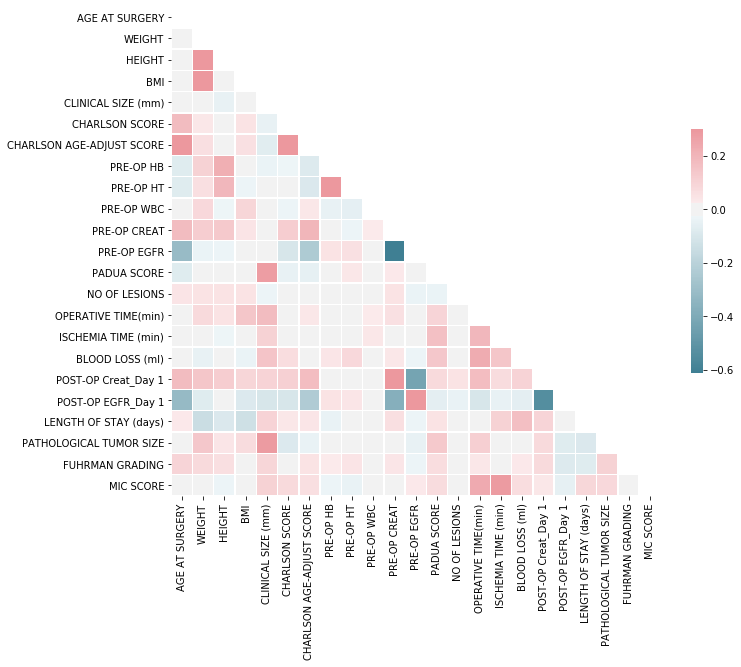

In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [92]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 102 columns):
PATIENT NUMBER                            object
PROC NAME                                 category
CENTER CODE                               object
REC PROGRESS                              object
CREATED DATE                              object
GENDER                                    category
AGE AT SURGERY                            float64
MARITAL STATUS                            category
RACE                                      category
WEIGHT                                    float64
HEIGHT                                    float64
BMI                                       float64
CLINICAL SIZE (mm)                        float64
CHARLSON SCORE                            float64
CHARLSON AGE-ADJUST SCORE                 float64
SYMPTOMS                                  category
SOLITARY KIDNEY                           category
BILATERALITY OF TUMOR                   

In [93]:
# list of variables included for Pathology 
df_filter_intra_op = df[['PROC NAME',
                         'GENDER',
                         'AGE AT SURGERY',
                         'MARITAL STATUS',
                         'RACE',
                         'WEIGHT',
                         'HEIGHT',
                         'BMI',
                         'CLINICAL SIZE (mm)',
                         #'CHARLSON SCORE',
                         #'CHARLSON AGE-ADJUST SCORE',
                         'SYMPTOMS',
                         'SOLITARY KIDNEY',
                         'BILATERALITY OF TUMOR',
                         'SIDE OF TUMOR',
                         'SIDE OF SURGERY',
                         'FACE',
                         'TUMOR lOCATION',
                         'PRE-OP HB',
                         'PRE-OP HT',
                         'PRE-OP WBC',
                         'PRE-OP CREAT',
                         'PRE-OP EGFR',
                         #'PADUA SCORE',
                         #'PADUA RISK',
                         'POLAR LOCATION',
                         'RENAL SINUS',
                         #'UCS INVASION',
                         'EXOPHYTIC RATE',
                         'CLINICAL SIZE GROUP',
                         'CT',
                         'CN',
                         'CM',
                         #'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
                         'RADIUS (maximal diameter in cm)',
                         'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
                         'ANTERIOR OR POSTERIOR',
                         'ASA SCORE',
                         'PARTIAL NEPHRO INDICATION',
                         'NO OF LESIONS',
                         #'ACCESS',
                         'PATHOLOGY']]

In [94]:
df_filter_intra_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 35 columns):
PROC NAME                          3312 non-null category
GENDER                             3312 non-null category
AGE AT SURGERY                     3312 non-null float64
MARITAL STATUS                     3312 non-null category
RACE                               3312 non-null category
WEIGHT                             3312 non-null float64
HEIGHT                             3312 non-null float64
BMI                                3312 non-null float64
CLINICAL SIZE (mm)                 3312 non-null float64
SYMPTOMS                           3312 non-null category
SOLITARY KIDNEY                    3312 non-null category
BILATERALITY OF TUMOR              3312 non-null category
SIDE OF TUMOR                      3312 non-null category
SIDE OF SURGERY                    3312 non-null category
FACE                               3312 non-null category
TUMOR lOCATION              

In [95]:
# dropping records with missing target variable
df_filter2 = df_filter_intra_op[df_filter_intra_op['PATHOLOGY'] != 'NA'].copy()

In [96]:
df_filter2.reset_index(drop=True, inplace=True)
print("Number records for predicting PATHOLOGY: {}".format(len(df_filter2)))

Number records for predicting PATHOLOGY: 3084


In [97]:
df_filter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 35 columns):
PROC NAME                          3084 non-null category
GENDER                             3084 non-null category
AGE AT SURGERY                     3084 non-null float64
MARITAL STATUS                     3084 non-null category
RACE                               3084 non-null category
WEIGHT                             3084 non-null float64
HEIGHT                             3084 non-null float64
BMI                                3084 non-null float64
CLINICAL SIZE (mm)                 3084 non-null float64
SYMPTOMS                           3084 non-null category
SOLITARY KIDNEY                    3084 non-null category
BILATERALITY OF TUMOR              3084 non-null category
SIDE OF TUMOR                      3084 non-null category
SIDE OF SURGERY                    3084 non-null category
FACE                               3084 non-null category
TUMOR lOCATION              

In [98]:
# fit label encoder to each column of type category
cat_col =df_filter2.select_dtypes('category')
df_filter2_codes = df_filter2.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_filter2_codes[col])

In [99]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'PROC NAME': {'Partial Nephrectomy': 0},
 'GENDER': {'Female': 0, 'Male': 1, 'NA': 2},
 'MARITAL STATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARY KIDNEY': {'NA': 0, 'No': 1, 'Yes': 2},
 'BILATERALITY OF TUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDE OF TUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDE OF SURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'FACE': {'Anterior': 0, 'NA': 1, 'Posterior': 2},
 'TUMOR lOCATION': {'Lower Pole': 0, 'Mid Pole': 1, 'NA': 2, 'Upper Pole': 3},
 'POLAR LOCATION': {'NA': 0,
  'Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points)': 1,
  'Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)': 2},
 'RENA

In [108]:
le_dict

{'PROC NAME': LabelEncoder(),
 'GENDER': LabelEncoder(),
 'MARITAL STATUS': LabelEncoder(),
 'RACE': LabelEncoder(),
 'SYMPTOMS': LabelEncoder(),
 'SOLITARY KIDNEY': LabelEncoder(),
 'BILATERALITY OF TUMOR': LabelEncoder(),
 'SIDE OF TUMOR': LabelEncoder(),
 'SIDE OF SURGERY': LabelEncoder(),
 'FACE': LabelEncoder(),
 'TUMOR lOCATION': LabelEncoder(),
 'POLAR LOCATION': LabelEncoder(),
 'RENAL SINUS': LabelEncoder(),
 'EXOPHYTIC RATE': LabelEncoder(),
 'CLINICAL SIZE GROUP': LabelEncoder(),
 'CT': LabelEncoder(),
 'CN': LabelEncoder(),
 'CM': LabelEncoder(),
 'RADIUS (maximal diameter in cm)': LabelEncoder(),
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES': LabelEncoder(),
 'ANTERIOR OR POSTERIOR': LabelEncoder(),
 'ASA SCORE': LabelEncoder(),
 'PARTIAL NEPHRO INDICATION': LabelEncoder(),
 'PATHOLOGY': LabelEncoder()}

In [100]:
# Check Distibution of target variable and assign 1 to minority class
df['PATHOLOGY'].value_counts()

Malign    2460
Benign     624
NA         228
Name: PATHOLOGY, dtype: int64

In [101]:
# Update labels for target class so that miniority class is positive class
label_mapping['PATHOLOGY']['Benign'] = 1
label_mapping['PATHOLOGY']['Malign'] = 0
label_mapping['PATHOLOGY']

{'Benign': 1, 'Malign': 0}

In [102]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_filter2_codes[col] = le_dict[col].transform(df_filter2_codes[col]).copy()

In [125]:
df_filter2_codes['PATHOLOGY'] = le_dict['PATHOLOGY'].inverse_transform(df_filter2_codes['PATHOLOGY']).copy()

In [128]:
df_filter2_codes['PATHOLOGY'] = df_filter2_codes['PATHOLOGY'].map(label_mapping['PATHOLOGY']).copy()

In [129]:
df_filter2_codes.head()

,PROC NAME,GENDER,AGE AT SURGERY,MARITAL STATUS,RACE,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),SYMPTOMS,SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,RENAL SINUS,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,PATHOLOGY
0,0,0,50.0,1,3,57.00,168.0,20.20,7.0,0,1,1,1,1,2,0,13.2,50.0,7800.0,0.63,100.030000,2,3,0,2,3,3,3,2,1,2,0,1,1.0,1
1,0,0,69.0,0,4,68.60,161.3,26.37,74.0,0,1,1,3,3,2,1,14.7,44.2,6400.0,0.80,71.119672,1,2,1,2,3,3,1,2,0,3,2,3,1.0,1
2,0,0,83.0,4,4,83.65,164.0,31.10,80.0,0,1,1,1,1,0,0,12.5,38.9,5590.0,0.97,54.844682,2,2,1,2,3,1,1,2,0,0,1,1,1.0,0
3,0,1,66.0,3,4,107.00,180.0,32.78,73.0,0,1,1,3,3,2,3,17.0,50.8,8000.0,0.93,81.290783,2,2,1,2,2,1,1,2,0,3,1,1,1.0,0
4,0,1,61.0,1,3,82.90,171.0,28.35,8.0,0,1,1,3,3,2,1,12.1,37.1,7710.0,1.10,68.053260,1,3,0,2,3,1,1,2,1,2,1,1,1.0,0


In [130]:
df_filter2_codes['PATHOLOGY'].value_counts()

0    2460
1     624
Name: PATHOLOGY, dtype: int64

In [131]:
df_filter2.head()

,PROC NAME,GENDER,AGE AT SURGERY,MARITAL STATUS,RACE,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),SYMPTOMS,SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,RENAL SINUS,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,PATHOLOGY
0,Partial Nephrectomy,Female,50.0,Married,Others,57.00,168.0,20.20,7.0,Absent,No,No,Left,Left,Posterior,Lower Pole,13.2,50.0,7800.0,0.63,100.030000,Tumours entirely located above the upper or be...,With renal sinus involvement (2 points),< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,=>7,<50%,Neither(x),Category 1,Elective,1.0,Benign
1,Partial Nephrectomy,Female,69.0,Divorced,White/Caucasian,68.60,161.3,26.37,74.0,Absent,No,No,Right,Right,Posterior,Mid Pole,14.7,44.2,6400.0,0.80,71.119672,Tumours crossing the sinus line >50% or fallin...,Tumours without renal sinus involvement (1 point),= 50% exophytic (1 point),=>7cm,T2a,Nx,M0,=>7,50%,Posterior (p),Category 3,Relative,1.0,Benign
2,Partial Nephrectomy,Female,83.0,Widowed,White/Caucasian,83.65,164.0,31.10,80.0,Absent,No,No,Left,Left,Anterior,Lower Pole,12.5,38.9,5590.0,0.97,54.844682,Tumours entirely located above the upper or be...,Tumours without renal sinus involvement (1 point),= 50% exophytic (1 point),=>7cm,T2a,N0,M0,=>7,50%,Anterior (a),Category 2,Elective,1.0,Malign
3,Partial Nephrectomy,Male,66.0,Single,White/Caucasian,107.00,180.0,32.78,73.0,Absent,No,No,Right,Right,Posterior,Upper Pole,17.0,50.8,8000.0,0.93,81.290783,Tumours entirely located above the upper or be...,Tumours without renal sinus involvement (1 point),= 50% exophytic (1 point),=>7cm,T1b,N0,M0,=>7,50%,Posterior (p),Category 2,Elective,1.0,Malign
4,Partial Nephrectomy,Male,61.0,Married,Others,82.90,171.0,28.35,8.0,Absent,No,No,Right,Right,Posterior,Mid Pole,12.1,37.1,7710.0,1.10,68.053260,Tumours crossing the sinus line >50% or fallin...,With renal sinus involvement (2 points),< 50%exophytic (2 points),=>7cm,T2a,N0,M0,=>7,<50%,Neither(x),Category 2,Elective,1.0,Malign


In [132]:
output_path = 'H:\RediMinds\VCQI'
df_filter2_codes.to_csv(output_path+"\VCQI_clean_pathology.csv",index=False)

In [133]:
import pickle

with open(output_path+'\cat_col_pathalogy', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)